Zachary Proom

EN.605.646.81: Natural Language Processing

# Lab #4

## a

First, I create a Word2Vec model using the code and data provided in the lab instructions.

In [1]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
import spacy
from nltk.tokenize import word_tokenize
import spacy
import numpy as np
from itertools import islice

# Turn off some SpaCy features to speed up tokenization.
nlp = spacy.load('en_core_web_sm', disable = ['ner', 'parser'])

In [2]:
# Run SpaCy's tokenizer over each line in small.txt, then pull out the text of the tokens (ignoring punctuation). 
# We will end up with a list of lists, one per line, where each contained list is a list of the words in the 
# sentence as strings
with open('data/small.txt', 'r') as infile:
    collection = [[token.text for token in nlp(line.lower()) if not token.is_punct] for line in infile]

In [3]:
# Safety check to make sure our data was loaded correctly.
assert len(collection) == 50000, "Load of small.txt failed"
print(collection[42])

['you', "'ve", 'literally', 'taken', 'on', 'the', 'energy', 'of', 'this', 'dear', 'one', 'in', 'your', 'life', 'and', 'there', "'s", 'some', 'interesting', 'dynamics', 'here', 'and', 'i', 'hope', 'you', 'do', "n't", 'mind', 'me', 'being', 'a', 'little', 'bit', 'direct', '\n']


In [4]:
# Build a 100-dimensional Word2Vec model, using gensim's implementation of Word2Vec.
model = Word2Vec(sentences=collection, vector_size=100, window=5, min_count=2, sg=1, negative=8)
print(model)

Word2Vec<vocab=26733, vector_size=100, alpha=0.025>


Next, I visualize the vector relationships between related words by making a 2-dimensional projection using principal component analysis (PCA). I create a scatter plot for the list of words provided in the instructions: ['paris', 'istanbul', 'moscow', 'france', 'turkey', 'russia', 'cat',
 'dog', 'truck', 'train', 'two', 'three', 'four'].

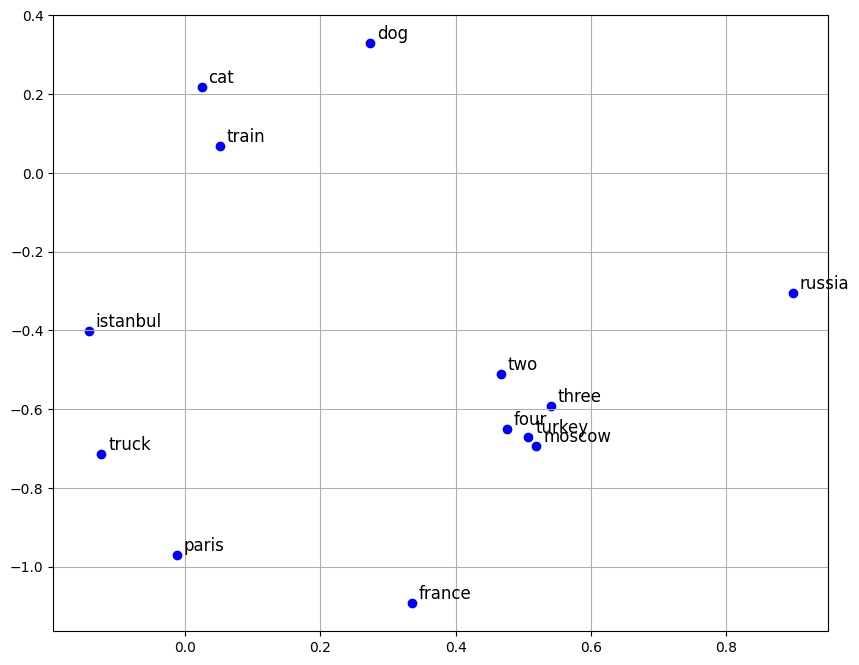

In [5]:
# First, extract word vectors from the model.
word_vectors_original = model.wv

# Get the list of words and their corresponding vectors.
all_words = list(word_vectors_original.key_to_index) # This contains all the words in the vocabulary.
word_vectors = word_vectors_original[all_words]

# Next, apply PCA to reduce to 2 dimensions.
pca_model = PCA(n_components = 2)
word_vectors_2d = pca_model.fit_transform(word_vectors)

# Indices of words in the instructions.
words_to_plot = ['paris', 'istanbul', 'moscow', 'france', 'turkey', 'russia', 'cat',
 'dog', 'truck', 'train', 'two', 'three', 'four']
selected_indices = [all_words.index(word) for word in words_to_plot]
selected_vectors_2d = word_vectors_2d[selected_indices]

# Create a plot for the list of words in the instructions.
plt.figure(figsize= (10, 8))
plt.scatter(selected_vectors_2d[:, 0], selected_vectors_2d[:, 1], color = "blue")

# Label all the points.
for word, (x, y) in zip(words_to_plot, selected_vectors_2d):
    plt.text(x + 0.01, y + 0.01, word, fontsize = 12)
plt.grid()
plt.show()

Next, I load word vectors generated from a much larger collection: Google News pretrained embeddings. I use the code provided in the instructions to obtain the word vectors and model.

In [6]:
model = KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin", binary=True)
print(model['purple'])

[ 1.21093750e-01 -4.68750000e-02  3.58886719e-02  2.83203125e-01
 -1.66015625e-01 -8.05664062e-02  6.17675781e-02 -4.84375000e-01
 -9.47265625e-02 -4.88281250e-03 -1.34765625e-01  1.13281250e-01
  2.12890625e-01  9.91210938e-02 -1.34765625e-01 -2.25585938e-01
 -2.42187500e-01  1.56250000e-01 -6.98242188e-02 -2.18750000e-01
 -1.47460938e-01  2.98828125e-01 -1.01928711e-02 -2.21679688e-01
 -2.25585938e-01 -3.17382812e-02 -1.73828125e-01  4.68750000e-02
  2.50244141e-02 -2.21679688e-01 -4.39453125e-02  2.41210938e-01
  1.25976562e-01  1.62353516e-02 -1.08398438e-01  6.83593750e-02
  3.63281250e-01 -4.94384766e-03 -8.83789062e-02  2.22656250e-01
  7.32421875e-02 -8.34960938e-02 -4.71191406e-02 -2.69531250e-01
  1.26953125e-01 -8.30078125e-02  9.33837891e-03 -2.46093750e-01
 -7.56835938e-02  1.45507812e-01 -1.92382812e-01  1.26953125e-01
  1.85546875e-01 -3.05175781e-02  4.78515625e-02  4.73022461e-03
 -1.25000000e-01 -1.16210938e-01 -7.37304688e-02 -8.30078125e-02
 -1.94335938e-01  1.11816

I use the gensim API and the word vectors I loaded in above to answer a few questions.

### a

First, I find the words most similar to 'fascinating,' 'cultivate,' and 'eggplant'.

In [7]:
for word in ["fascinating", "cultivate", "eggplant"]:
    print("Words most similar to " + word + ":")
    print(model.most_similar(positive = [word]))
    print("")

Words most similar to fascinating:
[('interesting', 0.7623067498207092), ('intriguing', 0.7245113253593445), ('enlightening', 0.6644250154495239), ('captivating', 0.6459898352622986), ('facinating', 0.6416683793067932), ('riveting', 0.6324825286865234), ('instructive', 0.6210989356040955), ('endlessly_fascinating', 0.6188612580299377), ('revelatory', 0.6170244216918945), ('engrossing', 0.6126049160957336)]

Words most similar to cultivate:
[('cultivating', 0.7274795174598694), ('cultivated', 0.6766660809516907), ('nurture', 0.6695472002029419), ('cultivates', 0.6159787178039551), ('develop', 0.6053071618080139), ('Cultivate', 0.5910324454307556), ('Cultivating', 0.566783607006073), ('nuture', 0.5440779328346252), ('nourish', 0.5328434109687805), ('grow', 0.5282535552978516)]

Words most similar to eggplant:
[('zucchini', 0.7264777421951294), ('cauliflower', 0.6968439221382141), ('eggplants', 0.6966414451599121), ('bok_choy', 0.6907373070716858), ('bell_peppers', 0.6875451803207397), ('

A few of the words reported above are reasonable synonyms. For example, interesting and captivating are reasonable synonyms for fascinating, and develop is a reasonable synonym for cultivate. I don't see any antonyms in the results. 

### b

Next, I test out the similarity and distance methods.

In [8]:
print(model.similarity("mother", "father"))
print(model.similarity("mother", "ocean"))
print(model.distance("mother", "ocean"))
print(model.similarity("mother", "ocean") + model.distance("mother", "ocean"))

0.7901483
0.10562343
0.8943765684962273
1.0


In [9]:
print(model.distance("dog", "philosophy"))
print(model.similarity("dog", "wolf"))

0.9116701409220695
0.44815394


In [10]:
print(model.similarity("easy", "hard"))
print(model.similarity("easy", "simple"))
print(model.similarity("easy", "tree"))
print(model.similarity("jump", "jumped"))
print(model.similarity("jump", "hop"))

0.47096327
0.59902996
0.073193364
0.5995128
0.41159925


The similarity and distance methods are intuitive based on the tests above. Pairs of words that fall into similar categories (e.g. "mother" and "father") have high similarity scores (and low distance scores). Words that are unrelated (e.g. "mother" and "ocean", "dog" and "philosophy", "easy" and "tree") have low similarity scores. Antonyms seem to have lower similarity scores than synonyms, but antonyms still have higher similarity scores than unrelated words (e.g. "easy", "hard", and "tree"). Variations of word tenses ("jump" and "jumped") have high similarity scores, like synonyms.

### c

In [11]:
X_words = model.most_similar(positive = ['cat', 'puppies'], negative = ['dog'], topn = 5)
print(X_words)

[('kittens', 0.7716175317764282), ('cats', 0.735849142074585), ('kitten', 0.6659281253814697), ('pups', 0.6466317176818848), ('felines', 0.6201465129852295)]


The words above best complete the analogy "puppies is to dog as X is to cat". The best word is kittens, followed by cats and kitten.

### d

In [12]:
X_words = model.most_similar(positive = ['France', 'Berlin'], negative = ['Germany'], topn = 5)
print(X_words)

[('Paris', 0.7672387957572937), ('French', 0.6049168705940247), ('Parisian', 0.5810437202453613), ('Colombes', 0.5599985122680664), ('Hopital_Europeen_Georges_Pompidou', 0.555890679359436)]


In [13]:
X_words = model.most_similar(positive = ['cooked', 'help'], negative = ['helped'], topn = 5)
print(X_words)

[('cook', 0.5982624888420105), ('pan_fry', 0.5220369100570679), ('rewarm', 0.5139913558959961), ('adjust_seasoning', 0.5122271776199341), ('adjust_seasonings', 0.5096354484558105)]


Two other analogies I found with the API are: (1) "Berlin is to Germany as [Paris] is to France" and (2) "help is to helped as [cook] is to cooked". The word the API suggested is in square brackets. The first analogy involves capitals and countries, and the second involves present and past tenses.

### e

In [14]:
print(model.similarity("easy", "simple"))             # a) synonyms
print(model.similarity("easy", "hard"))               # b) antonyms
print(model.similarity("easy", "painless"))           # c) similar
print(model.similarity("easy", "effort"))             # d) related
print(model.similarity("easy", "difficulty"))         # e) subordinate/superordinate
print(model.similarity("easy", "dog"))                # f) unrelated
print("")
print(model.similarity("cold", "chilly"))             # a) synonyms
print(model.similarity("cold", "warm"))               # b) antonyms
print(model.similarity("cold", "crisp"))              # c) similar
print(model.similarity("cold", "emotion"))            # d) related
print(model.similarity("cold", "temperature"))        # e) subordinate/superordinate
print(model.similarity("cold", "jazz"))               # f) unrelated

0.59902996
0.47096327
0.47874242
0.1925349
0.23274907
0.047313508

0.68785566
0.59530354
0.29849678
0.1320636
0.45807198
0.06502327


I came up with a pair of words for each of the six categories, keeping one of the words fixed ("easy"). I repeated this experiment a second time, using "cold" as the constant word. I computed similarity scores for each pair of words. In both experiments, the synonyms have the highest similarity scores. The antonyms also have high similarity scores, but not quite as high as the synonyms. Subordinate/superordinate words also have high similarity scores, though the scores are not as high as the scores for synonyms and antonyms. Unrelated words consistently have very low similarity scores, as expected. Similar and related words fall somewhere in the middle. I wasn't sure I came up with great examples, which probably affected my results.

Since the results above follow a pattern, I think it's possible to determine whether a pair of words falls into one of the six categories.

### f

I thought the analogies below were dubious. I found them when testing analogies for part d. Otherwise, the analogies I tested in part d were reasonable.

In [15]:
X_words = model.most_similar(positive = ['Maryland', 'Dover'], negative = ['Delaware'], topn = 5)
print(X_words)

[('Martinsville', 0.5372768640518188), ('Virginia', 0.5164698362350464), ('Towson', 0.5147135853767395), ('Salisbury', 0.509498119354248), ('Charlottesville', 0.5092862248420715)]


In [16]:
X_words = model.most_similar(positive = ['tree', 'petal'], negative = ['flower'], topn = 5)
print(X_words)

[('tree_trunk', 0.5759392380714417), ('oak_tree', 0.5587239861488342), ('trees', 0.5467817783355713), ('pine_tree', 0.5454332232475281), ('tree_limb', 0.5213765501976013)]


The two analogies above are: (1) "Dover is to Delaware as [Martinsville] is to Maryland" and (2) "petal is to flower as [tree_trunk] is to tree". The top word the API suggested is in square brackets. For (1), the API returned a city in Virginia. I was hoping to see Annapolis in the results, but it isn't listed. Three out of the five top results are Virginia or cities in Virginia. Two of the results are cities in Maryland, but not the capital. I expected to see "leaf" in the results for (2), but it isn't listed. Some of the results (tree_trunk and tree limb) are somewhat reasonable.

## b

First, I initialize functions and data provided in the instructions.

In [17]:
def tokenize(sentence, nlp):
    doc = nlp(sentence)
    return [token.vector for token in doc], [token.text for token in doc]

def embed_word_contextual(word, sentence, nlp):
    embeddings, words = tokenize(sentence, nlp)
    return embeddings[words.index(word)]

senses = {"word": "bank",
          "river": [
              "river bank",
              "I buried the money in the river bank",
              "I buried the money in the bank",
              "on the bank of the Ohio river",
              "on the bank of the Ohio",
              "I slid down the bank",
              "Silt deposits covered the bank",
              "I left my favorite pen on the bank",
              "Fortunately, no one was hurt sliding down the bank",
              "The bank was slippery and treacherous",
            ],
          "money": [
              "money bank",
              "The bank is a safe place to store your wealth",
              "The bank is a safe place to store your money",
              "The savings bank is a safe place to store your money",
              "I deposited the money in the bank",
              "The bank failure caused havoc in the financial markets",
              "I left my favorite pen at the bank",
              "The bank teller lives down by the river",
              "Fortunately, no one was hurt during the bank robbery",
              "The bank robber was slippery and treacherous",
            ],
}

### a

First, I use PCA to create a two-dimensional plot of each of the instances of "bank" in the sentences above.

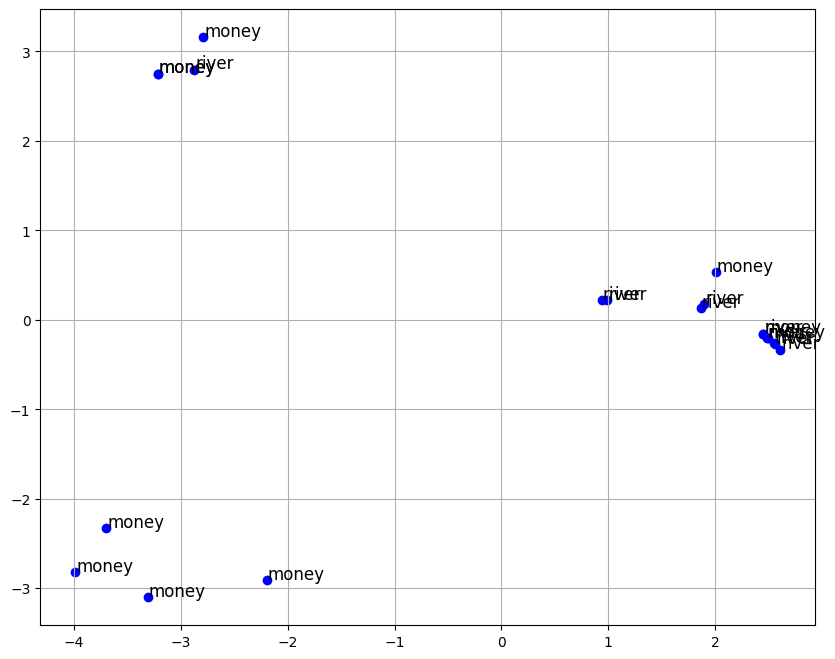

In [18]:
# Get the embeddings.
embeddings_bank = []
for key in senses:
    if key == "word":
        continue 
    else:
        for sentence in senses[key]:
            embeddings_bank.append(embed_word_contextual("bank", sentence, nlp))

# Apply PCA to reduce to 2 dimensions.
pca_model = PCA(n_components = 2)
word_vectors_2d_bank = pca_model.fit_transform(embeddings_bank)
sense_list = ["river"] * 10 + ["money"] * 10

# Create a plot for the list of words in the instructions.
plt.figure(figsize= (10, 8))
plt.scatter(word_vectors_2d_bank[:, 0], word_vectors_2d_bank[:, 1], color = "blue")

# Label the points based on sense.
for sense, (x, y) in zip(sense_list, word_vectors_2d_bank):
    plt.text(x + 0.01, y + 0.01, sense, fontsize = 12)
plt.grid()
plt.show()


There are three clusters in the two-dimensional plot above. 

The cluster in the bottom left contains the following sentences (sense in parentheses):

- I deposited the money in the bank (money)
- The bank teller lives down by the river (money)
- Fortunately, no one was hurt during the bank robbery (money)
- The bank robber was slippery and treacherous (money)

The cluster in the upper left contains the following sentences (sense in parentheses):

- The bank is a safe place to store your wealth (money)
- The bank is a safe place to store your money (money)
- The savings bank is a safe place to store your money (money)
- The bank was slippery and treacherous (river)

The cluster on the right contains the remaining sentences, which are a mixture of 3 "money sense" sentences and 9 "river sense" sentences (sense in parentheses):

- money bank (money)
- The bank failure caused havoc in the financial markets (money)
- I left my favorite pen at the bank (money)
- river bank (river)
- I buried the money in the river bank (river)
- I buried the money in the bank (river)
- on the bank of the Ohio river (river)
- on the bank of the Ohio (river)
- I slid down the bank (river)
- Silt deposits covered the bank (river)
- I left my favorite pen on the bank (river)
- Fortunately, no one was hurt sliding down the bank (river)


The first and second cluster make sense. The sentences in the first cluster are all "money sense" sentences that all reference people. The sentences in the second cluster all use words related to safety (safe, treacherous). I don't see a clear pattern to the sentences in the third cluster. The river and money senses of bank don't seem adequately separated because the third cluster contains a large number of both senses. 

### b

I chose the word "book" as an example of a word with multiple senses. One sense of the word that appears in small.txt is novel (e.g. read a book), and another sense of the word is reserve (e.g. book a hotel). I collect ten examples of each sense below.

In [19]:
senses = {"word": "book",
          "novel": [
              "The book is most valuable for the almost incidental credo on the importance of work and the role of the director and his tribute to the designer, Jocelyn Herbert.",
              "'I was shocked at how little interest there was in computer investing among individual investors' a few years ago, says Terry Jeffers, author of a book on computerized investing.",
              "Krug tells worried librarians who call that they should keep only the records they need and should discard records that would reveal which patron checked out a book and for how long.",
              "Phoebe Cates is blinking perfection as Amanda, who is more an idea than a character in the movie as in the book.",
              "A journalist won the 1988 National Book Award for non-fiction with a book about the Vietnam War, and a newspaper columnist took the fiction prize for a novel about the murder of a girl in Georgia.",
              "We believe that one day these children will have a chance to create their own book with memories of childhood, and we can help them to put more happy moments in it.",
              "A recent diet book called The Flat Belly Diet posits the idea that you can lose belly fat by eating a 1,600-calorie diet rich in monounsaturated fats.",
              "The book includes a picture.",
              "Yet now, if Thou wilt forgive their sin; and if not, blot me, I pray Thee, out of Thy book which Thou hast written.",
              "Whitehead said authors receive royalties of 4 percent of the paperback book profits."
            ],
          "reserve": [
              "book charter flights to Hurghada on TuristUA.com and enjoy your journey!",
              "If you want to hire any of Lamborghini cars in Santa Monica there is no need to locate a Lamborghini local dealer but only to call our VIP car rental service - whether you would like the car for self-drive usage or book it with a driver.",
              "Airbus Industrie, the European aircraft consortium, yesterday said it expects to book only 170 new orders this year, compared with 303 jets sold in 1990, because of the slowdown in passenger traffic.",
              "book flights on Ctrip and save on Kashi flight booking!",
              "The 24-hour reception team can book shuttles to Pulkovo Airport, only a 20-minute drive away.",
              "Having selected hotels and rates available for the required accommodation dates you can instantly book rooms and get a momentary confirmation of your booking.",
              "book Comfort Inn Mesquite Dallas online and save.",
              "When you book directly through us, you always get the best rates available!",
              "Our company provides for Varna available cars from all classes- check out our fleet of rental cars for Varna , find the car that best fits your needs and book it with Rentacar5.",
              "book service to use the new PAB file:"
            ],
}

Next, I repeat the analysis above, using these sentences.

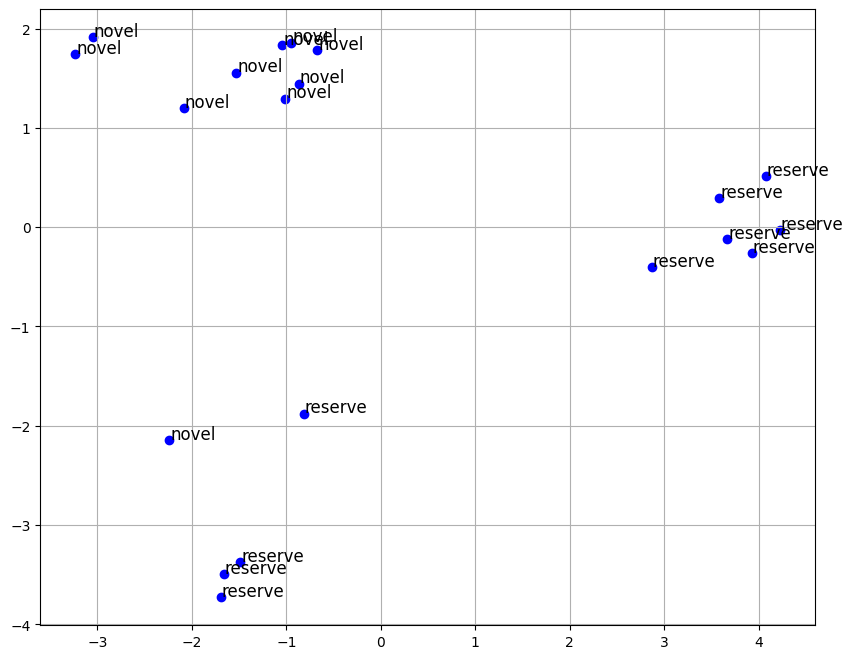

array([[ 0.6690997 , -0.16540845],
       [ 0.4851191 , -0.03149174],
       [ 0.62710226, -0.02565749],
       ...,
       [-0.37441105,  0.08568116],
       [-0.45260018, -0.01147424],
       [-0.47544414,  0.01914068]], dtype=float32)

In [20]:
# Get the embeddings.
embeddings_book = []
for key in senses:
    if key == "word":
        continue 
    else:
        for sentence in senses[key]:
            embeddings_book.append(embed_word_contextual("book", sentence, nlp))

# Apply PCA to reduce to 2 dimensions.
pca_model = PCA(n_components = 2)
word_vectors_2d_book = pca_model.fit_transform(embeddings_book)
sense_list = ["novel"] * 10 + ["reserve"] * 10

# Create a plot for the list of words in the instructions.
plt.figure(figsize= (10, 8))
plt.scatter(word_vectors_2d_book[:, 0], word_vectors_2d_book[:, 1], color = "blue")

# Label the points based on sense.
for sense, (x, y) in zip(sense_list, word_vectors_2d_book):
    plt.text(x + 0.01, y + 0.01, sense, fontsize = 12)
plt.grid()
plt.show()
word_vectors_2d

The novel and reserve senses of book seem better separated than the previous word (bank). The clusters mostly include only sentences from a single sense instead of mixing both senses. Again, there are three clusters.

Lower left cluster:

- Whitehead said authors receive royalties of 4 percent of the paperback book profits. (novel)
- book charter flights to Hurghada on TuristUA.com and enjoy your journey! (reserve)
- book flights on Ctrip and save on Kashi flight booking! (reserve)
- book service to use the new PAB file: (reserve)

Upper left cluster:

- The book is most valuable for the almost incidental credo on the importance of work and the role of the director and his tribute to the designer, Jocelyn Herbert. (novel)
- 'I was shocked at how little interest there was in computer investing among individual investors' a few years ago, says Terry Jeffers, author of a book on computerized investing. (novel)
- Krug tells worried librarians who call that they should keep only the records they need and should discard records that would reveal which patron checked out a book and for how long. (novel)
- Phoebe Cates is blinking perfection as Amanda, who is more an idea than a character in the movie as in the book. (novel)
- A journalist won the 1988 National Book Award for non-fiction with a book about the Vietnam War, and a newspaper columnist took the fiction prize for a novel about the murder of a girl in Georgia. (novel)
- We believe that one day these children will have a chance to create their own book with memories of childhood, and we can help them to put more happy moments in it. (novel)
- A recent diet book called The Flat Belly Diet posits the idea that you can lose belly fat by eating a 1,600-calorie diet rich in monounsaturated fats. (novel)
- The book includes a picture. (novel)
- Yet now, if Thou wilt forgive their sin; and if not, blot me, I pray Thee, out of Thy book which Thou hast written. (novel)

Right cluster:

- If you want to hire any of Lamborghini cars in Santa Monica there is no need to locate a Lamborghini local dealer but only to call our VIP car rental service - whether you would like the car for self-drive usage or book it with a driver. (reserve)
- Airbus Industrie, the European aircraft consortium, yesterday said it expects to book only 170 new orders this year, compared with 303 jets sold in 1990, because of the slowdown in passenger traffic. (reserve)
- The 24-hour reception team can book shuttles to Pulkovo Airport, only a 20-minute drive away. (reserve)
- Having selected hotels and rates available for the required accommodation dates you can instantly book rooms and get a momentary confirmation of your booking. (reserve)
- book Comfort Inn Mesquite Dallas online and save. (reserve)
- When you book directly through us, you always get the best rates available! (reserve)
- Our company provides for Varna available cars from all classes- check out our fleet of rental cars for Varna , find the car that best fits your needs and book it with Rentacar5. (reserve)

I'm not sure why the first cluster exists. I can't tell why those sentences are in that cluster instead of getting clustered with their sense (in the second or third cluster). The second and third clusters are very cleanly grouped by word sense.

### c

Finally, I average the embeddings from part A and create a similar 2-d plot.